# HIV Model

Sparsh Bansal

In [187]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [188]:
def make_system (Γ, μ, τ, β, ρ, α, σ, δ, π, dt):
    
    '''
    R = activated, uninfected CD4 lymphocytes
    L = latently infected cells
    E = actively infected cells
    V = free virions
    '''
    init = State(R = 200, L = 0, E = 0, V = 0.0000004)
    
    t_0 = 0
    t_end = 120/dt #This is not actually the end time, this is the end index
    return System(Γ=Γ, μ=μ, τ=τ, β=β, 
                  ρ=ρ, α=α, σ=σ, δ=δ,
                  π=π, t_0=t_0,
                  t_end=t_end, dt=dt,
                  init=init)

In [189]:
Γ = 1.36
μ = 1.36 * (10 ** (-3))
τ = 0.2
β = 0.00027
ρ = 0.1
α = 3.6 * (10 ** (-2))
σ = 2
δ = 0.33
π = 100
dt = 0.2
system = make_system (Γ, μ, τ, β, ρ, α, σ, δ, π, dt)

,values
Γ,1.36
μ,0.00136
τ,0.2
β,0.00027
ρ,0.1
α,0.036
σ,2
δ,0.33
π,100
t_0,0


In [190]:
def update_rates(state, system):
    unpack(system)
    
    r = state.R
    l = state.L
    e = state.E
    v = state.V
    
    dR = ((Γ * τ) - (μ * r) - (β * r * v)) * dt
    dL = ((ρ * β * r * v) - (μ * l) - (α * l)) * dt
    dE = ((1 - ρ) * (β * r * v) + (α * l) - (δ * e)) * dt
    dV = ((π * e) - (σ * v)) * dt
        
    r += dR
    l += dL
    e += dE
    v += dV
    
    return State(R=r, L=l, E=e, V=v)

In [191]:
def run_simulation(system, update_rates):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    time_frame = TimeFrame(columns=init.index)
    time_frame.row[0] = init
    ts = linrange(0, t_end, 1)
    
    for t in ts:
        time_frame.row[t+1] = update_rates(time_frame.row[t], system)
        
    return time_frame

In [192]:
HIV_attack = run_simulation(system, update_rates);

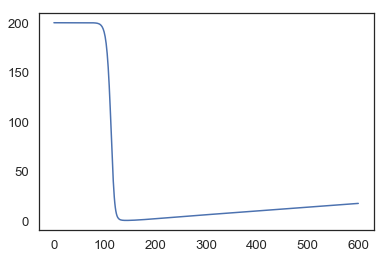

In [193]:
HIV_attack.R.plot()

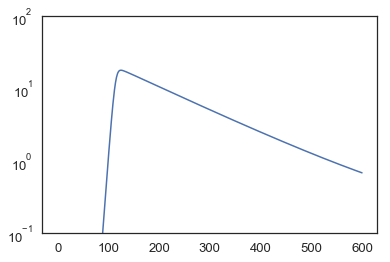

In [194]:
HIV_attack.L.plot(logy=True, ylim=[(10 ** (-1)), 100])

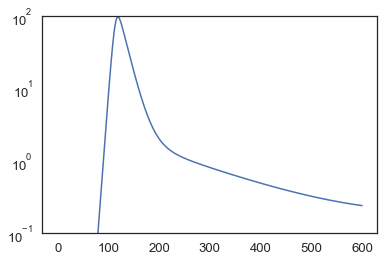

In [195]:
HIV_attack.E.plot(logy=True, ylim=[(10 ** (-1)), 100])

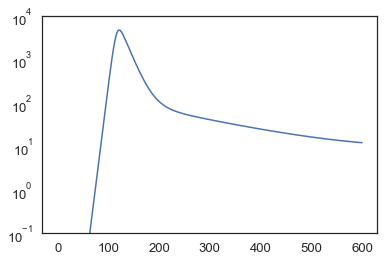

In [196]:
HIV_attack.V.plot(logy=True, ylim=[(10 ** (-1)), 10000])